###Project: Analysis of NASA Workforce Data from 2006 to 2016

####Team Members

- Chris Woodard
- Claire Chu
- Nathan Mowat
- Bill Kerneckel

###BUSINESS UNDERSTANDING

#####Describe the purpose of the data:
The National Aeronautics and Space Administration (NASA) was created by Congress in 1958 to explore space and push the boundaries of flight. When NASA created the first job descriptions knowns as Position Descriptions (PDs) to identify what skill sets would be needed to design execute, and oversee a plan to place person(s) aboard a human-rated expandable rocket that travels approximately 6,164 mph from Earth to the Moon, they started collecting and inventorying personnel data on all employees hired.

The data set our team will be examining is 10 years of workforce data collected by NASA from the years of 2006 to 2016. During this time span, NASA was operating several missions such as Space Shuttle, Space Station, Earth and Planetary Sciences, Aeronautical Research and Robotics. The data set is a catalog of personnel data of the type of skillsets it took to successful carry out this missions.

While the available data sets from NASA are almost infinte, we decided to focus our exploration on data from the last 10 years. Our data sets are comprised of 10 excel files downloaded from NASA Human Resources Agency database. Each excel file is one annual year of data. The data was retrieved only on active employees and exported to Excel using the SQL queries documented below. 

#####Proposed outcomes
As a team we want to investigate hiring seasonality in the NASA Human Resources agency. While there are close to 50 atttributes, we suspect that gender, paygrade, education level, promotion and diversity will be key predictors of years that NASA will increase or decrease hiring practices. As this is our first project exploring the data, we are documenting the cleaning and exploration of only 2 of the 10 years (2006 and 2007) as a proof on concept. Subsequent projects will include the remining 8 years of data both as part of the dataset and as part of the cross validation data. As a team, we want to produce reproducible code that will help us explore similar attributes in the other years of NASA Human Resources agency data. Successful predictions will be confirmed through cross validation with the remaining years of data.

###DATA UNDERSTANDING

####Defining the variables
Listed below are the column names, column types and definitions of all columns used for this analysis. Original Dataset had more than 75 variables, we have trimmed it to include the following 47 attributes. 


|  Column Name  	|   Type   	|                       Definition                       	|
|:-------------:	|:--------:	|:------------------------------------------------------:	|
| Agency        	| varchar  	| Agency code identifier                                 	|
| Bdyr          	| varchar  	| Birth year of employee                                 	|
| Coopsch       	| varchar  	| Co-op student's school / university code               	|
| Coopyr        	| varchar  	| Co-op's graduation year                                	|
| Currgrddte    	| datetime 	| Co-op's expected graduation date                       	|
| Dtystn_ind    	| char     	| Duty station code                                      	|
| Dtystnname    	| varchar  	| Location in the U.S. (County) code                     	|
| Edlev         	| char     	| Level of eduction code                                 	|
| Eoddte        	| datetime 	| Employment start date                                  	|
| Foulev        	| char     	| Fourth Completed level in College                      	|
| Fousch        	| char     	| Code associated with School (College/University Table) 	|
| Fouyr         	| char     	| Year attained                                          	|
| Frscdte       	| datetime 	| Federal Retirement Service Complete date               	|
| Fscdte        	| datetime 	| Federal Service Complete Date                          	|
| Grade         	| char     	| Grade level of employee. 1-15                          	|
| Hilev         	| char     	| First school Level                                     	|
| Hisch         	| varchar  	| First school Code                                      	|
| Hiyr          	| varchar  	| First school Graduation Year                           	|
| Install       	| char     	| Center Code (72 = JSC)                                 	|
| Lastpromodt   	| datetime 	| Last promotion date                                    	|
| Loccde        	| varchar  	| Duty Station Code – Where the employee is located      	|
| Nasattl       	| char     	| NASA Job Title                                         	|
| NCC           	| varchar  	| NASA Class Code (Job Classification)                   	|
| Nextwigdte    	| datetime 	| Next with in grade date.                               	|
| Occode        	| varchar  	| Occupational Series Code                               	|
| Opmtitle      	| varchar  	| OP Job Title                                           	|
| Orga          	| varchar  	| Organization Code                                      	|
| Orgabr        	| varchar  	| Organization Branch                                    	|
| Orgadir       	| varchar  	| Organization Directorate                               	|
| Orgadiv       	| varchar  	| Organization Division                                  	|
| Orgasec       	| varchar  	| Organization Section                                   	|
| Postenure     	| char     	| Position Tenure (P=Permanent T=Term)                   	|
| Promontedte   	| datetime 	| Projected Promotion Date                               	|
| Retoptdte     	| datetime 	| Retirement Optional Date                               	|
| Rno           	| varchar  	| Race and National Origin Indicator                     	|
| Seclev        	| varchar  	| Second Completed level in College                      	|
| Secsch        	| varchar  	| Code associated with School (College/University Table) 	|
| Secyr         	| varchar  	| Year attained                                          	|
| Sex           	| varchar  	| Sex                                                    	|
| Step_emp      	| varchar  	| Current step level of the Employee                     	|
| Supind        	| varchar  	| Supervisor Indicator                                   	|
| Suplev        	| varchar  	| The level of the supervisor.                           	|
| Tenure        	| varchar  	| Type of position indicator                             	|
| Time_in_grade 	| varchar  	| Years  in the current grade level                      	|
| Typappt       	| varchar  	| Type of Appointment                                    	|

#### Excel Import to verify data

In [45]:
#load python libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob
import xlrd 
import xlwt

import sys
import os




ImportError: No module named 'xlwt'

In [8]:
#load data file
data_file = pd.read_excel('/Users/macnificent/desktop/NASA_2006.xls')
data_file2 = pd.read_excel('/Users/macnificent/desktop/NASA_2007.xls')

In [9]:
#lets see how many records there are 1st execel file
print("Total Rows: {0}".format(len(data_file)))

Total Rows: 18732


In [10]:
#lets see how many records there are 2nd execel file
print("Total Rows: {0}".format(len(data_file2)))

Total Rows: 18738


In [11]:
#lets see the header columns and types. Column headings are the same in both files.
print(data_file.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18732 entries, 0 to 18731
Data columns (total 47 columns):
year             18732 non-null object
agency           18732 non-null object
bdyr             18732 non-null object
coopsch          419 non-null object
coopyr           441 non-null object
currgrddte       18723 non-null datetime64[ns]
dtystn_ind       18732 non-null object
dtystnname       18732 non-null object
edlev            18709 non-null object
eoddte           18732 non-null datetime64[ns]
foulev           219 non-null object
fousch           217 non-null object
fouyr            18732 non-null object
frscdte          18732 non-null datetime64[ns]
fscdte           18732 non-null datetime64[ns]
grade            18732 non-null object
hilev            18709 non-null object
hisch            14941 non-null object
hiyr             18732 non-null object
install          18732 non-null object
lastpromodte     18729 non-null datetime64[ns]
loccde           18732 non-null object
n

Data has been read into memory.

In [20]:
#let's check to see where the null values are for 2006
data_file.isnull().sum()

year                 0
agency               0
bdyr                 0
coopsch          18313
coopyr           18291
currgrddte           9
dtystn_ind           0
dtystnname           0
edlev               23
eoddte               0
foulev           18513
fousch           18515
fouyr                0
frscdte              0
fscdte               0
grade                0
hilev               23
hisch             3791
hiyr                 0
install              0
lastpromodte         3
loccde               0
nasattl           9982
ncc                  0
nextwigdte        3488
occode               0
opmtitle             0
orga                 0
orgabr               0
orgadir              0
orgadiv             13
orgasec              0
postenure            0
promontedte      18566
retdiscdte          94
retoptdte           94
rno                  1
seclev           11198
secsch           11482
secyr                0
sex                  0
step_emp             0
supind               0
suplev     

In [21]:
#let's check to see where the null values are for 2007
data_file2.isnull().sum()

year                 0
agency               0
bdyr                 0
coopsch          18239
coopyr               0
currgrddte          42
dtystn_ind           0
dtystnname           0
edlev               34
eoddte               0
foulev           18500
fousch           18508
fouyr                0
frscdte              0
fscdte               0
grade                0
hilev               34
hisch             3327
hiyr                 0
install              0
lastpromodte         1
loccde               0
nasattl           9497
ncc                  0
nextwigdte        3480
occode               0
opmtitle             0
orga                 0
orgabr               0
orgadir              0
orgadiv             24
orgasec              0
postenure            0
promontedte      18566
retdiscdte         114
retoptdte          114
rno                  0
seclev           10988
secsch           11300
secyr                0
sex                  0
step_emp             0
supind               0
suplev     

We can see the majority of the null values exist in the following categories


|  Column Name  	|                       Definition                       	|
|:-------------:	|:------------------------------------------------------:	|
| Coopsch        	| Co-op student's school / university code               	|
| Foulev          	| Fourth completed level in college                        	|
| Fousch        	| Code associated with School (College/University Table)	|
| Promontedte       | Projected Promotion Date                                	|

We can see that most of these have to do with the school. This could be a result of employees either declining to answer where they went to school or, the more likely situation, employees not remembering their university code. Let's see what we can do about the null values.

####Data Cleaning

In [22]:
#Remove all Null values from each dataset
data_file = data_file.replace(to_replace='NULL', value= -1)
data_file2 = data_file2.replace(to_replace='NULL', value= -1)

Converting all null values to -1, we can better anticipate ..... ?

In [23]:
##df[continuous_features] = df[continuous_features].astype(np.float64)
# To drop the first row
#data_file.drop(0, axis = 0,inplace = True)
#data_file2.drop(0, axis = 0,inplace = True)

# Change columns to float
#df[continuous_features] = df[continuous_features].astype(np.float64)

In [25]:
# creating a dataframes for the entire excel file
df = pd.DataFrame(data_file)
df2 = pd.DataFrame(data_file2)

In [28]:
# Outputting the Header information of the first dataset (data_file)
df.head()

,year,agency,bdyr,coopsch,coopyr,currgrddte,dtystn_ind,dtystnname,edlev,eoddte,...,seclev,secsch,secyr,sex,step_emp,supind,suplev,tenure,time_in_grade,typappt
0,------,------,----,--------,------,2017-01-28,----------,----------------------------------------------...,-----,2017-01-28,...,------,--------,------,----,--------,------,------,------,---------------------,-------
1,2006,NN51,1900,NaN,NaN,1989-10-08,80,"GREENBELT,PRINCE GEORGE'S,MARYLAND",9,1991-07-14,...,NaN,NaN,0,F,9,8,34,1,205.46,10
2,2006,NN51,1980,NaN,NaN,2002-09-22,80,"GREENBELT,PRINCE GEORGE'S,MARYLAND",13,1990-07-01,...,NaN,NaN,0,F,6,2,26,1,50,10
3,2006,NN23,1986,NaN,NaN,1996-07-21,88,"HAMPTON,HAMPTON,VIRGINIA",10,1985-04-01,...,NaN,NaN,0,M,8,8,34,1,124.04,10
4,2006,NN64,1994,NaN,NaN,2005-04-17,88,"STENNIS SPACE CENTER, HANCOCK, MISSISSIPPI",21,2005-03-03,...,NaN,NaN,0,M,2,2,26,1,19.17,10


In [29]:
# Outputting the Header information of the second dataset (data_file2)
df2.head()


,year,agency,bdyr,coopsch,coopyr,currgrddte,dtystn_ind,dtystnname,edlev,eoddte,...,seclev,secsch,secyr,sex,step_emp,supind,suplev,tenure,time_in_grade,typappt
0,------,------,----,--------,------,2017-01-28,----------,----------------------------------------------...,-----,2017-01-28,...,------,--------,------,----,--------,------,------,------,---------------------,-------
1,2007,NN23,2005,NaN,0,1999-04-25,88,"HAMPTON,HAMPTON,VIRGINIA",17,1991-07-29,...,13,8477,2003,F,8,8,34,1,101.07,10
2,2007,NN62,1976,NaN,0,1990-11-18,32,"REDSTONE ARSENAL,MADISON,ALABAMA",14,2006-03-15,...,13,1965,1973,M,9,8,34,1,202.3,10
3,2007,NN76,1987,NaN,0,2002-06-02,88,"KENNEDY SPACE CENTER,BREVARD,FLORIDA",13,1988-09-19,...,NaN,NaN,0,F,5,2,29,1,63.81,10
4,2007,NN76,1990,NaN,0,2006-07-23,88,"KENNEDY SPACE CENTER,BREVARD,FLORIDA",13,2000-07-16,...,NaN,NaN,0,M,6,8,34,1,14.14,10


In [37]:
df.describe().transpose()
#it is important to notice here that most of these variables are categorical
#references to another list. for example, "agency" code correlates to a specific NASA location.

,count,unique,top,freq,first,last
year,18732,2,2006,18731,NaN,NaN
agency,18732,11,NN72,3445,NaN,NaN
bdyr,18732,66,1900,2757,NaN,NaN
coopsch,419,130,1631,22,NaN,NaN
coopyr,441,13,2008,120,NaN,NaN
currgrddte,18723,1364,2006-08-20 00:00:00,177,1963-01-13 00:00:00,2017-01-28 00:00:00
dtystn_ind,18732,22,88,4967,NaN,NaN
dtystnname,18732,95,"HOUSTON,HARRIS,TEXAS",3369,NaN,NaN
edlev,18709,22,13,6021,NaN,NaN
eoddte,18732,3842,1994-10-02 00:00:00,188,1948-07-07 00:00:00,2017-01-28 00:00:00


In [38]:
df2.describe().transpose()

,count,unique,top,freq,first,last
year,18738,2,2007,18737,NaN,NaN
agency,18738,11,NN72,3424,NaN,NaN
bdyr,18738,66,1900,2716,NaN,NaN
coopsch,499,154,5248,24,NaN,NaN
coopyr,18738,14,0,18238,NaN,NaN
currgrddte,18696,1362,2006-11-12 00:00:00,153,1963-01-13 00:00:00,2017-01-28 00:00:00
dtystn_ind,18738,23,88,4968,NaN,NaN
dtystnname,18738,96,"HOUSTON,HARRIS,TEXAS",3366,NaN,NaN
edlev,18704,22,13,6130,NaN,NaN
eoddte,18738,3805,1994-10-02 00:00:00,174,1948-07-07 00:00:00,2017-01-28 00:00:00


Data has been verified and converted to dataframe.

#### Analysis of Data

In [40]:
# 2006 Female and Male counts to generate pie chart
pd.crosstab(index=df["sex"],columns="count") 


col_0,count
sex,
----,1
F,6587
M,12144


In [41]:
# 2007 Female and Male counts to generate pie chart 
pd.crosstab(index=df2["sex"],columns="count") 

col_0,count
sex,
----,1
F,6612
M,12125


In [46]:
# Proportion of Males to Females in 2006 (Pie Graph)
from pylab import *

# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = 'Males', 'Females'
fracs = [12144, 6587]

pie(fracs, labels=labels,
                autopct='%1.1f%%', shadow=True, startangle=90)

title('Proportion of Males to Females in 2006', bbox={'facecolor':'0.8', 'pad':5})

show()

We can see that Males outnumber Females 65% to 35%.

In [47]:
# Proportion of Males to Females in 2007 (Pie Graph)
from pylab import *

# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = 'Males', 'Females'
fracs = [12125, 6612]


pie(fracs, labels=labels,
                autopct='%1.1f%%', shadow=True, startangle=90)

title('Proportion of Males to Females in 2007', bbox={'facecolor':'0.8', 'pad':5})

show()

2007 seems to be consistent with 2006 in that there are 65% Males and 35% Females.

In [33]:
# Employees by Grade for 2006
pd.crosstab(index=df["grade"],columns="count") 
# note: grade 0 represents Senior Executive Service (SES) aka the highest paygrade

col_0,count
grade,
0,647
1,4
2,12
3,11
4,44
5,128
6,425
7,462
8,253


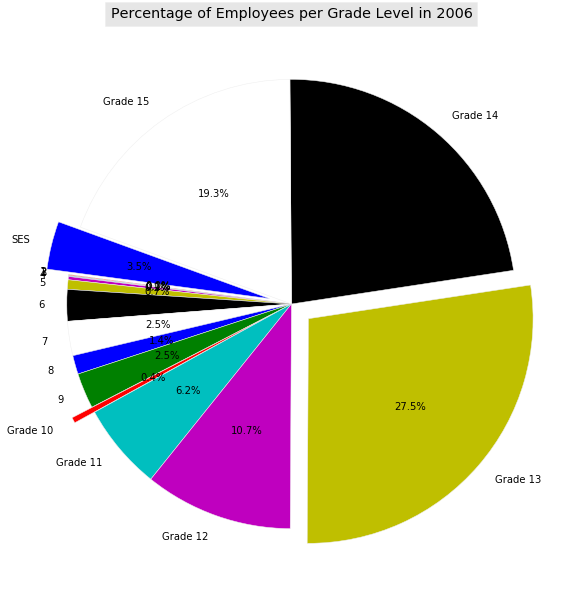

In [60]:
# Grades by Percentages in 2006
figure(1, figsize=(6,6))
ax = axes([0.2, 0.2, 1.3, 1.3])

# The slices will be ordered and plotted counter-clockwise.
labels = 'SES', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Grade 10', 'Grade 11', 'Grade 12', 'Grade 13', 'Grade 14', 'Grade 15'
fracs = [647, 4, 12, 11, 44, 128, 425, 462, 253, 477, 76, 1168, 2000, 5148, 4254, 3622]
explode = [0.1,0,0,0,0,0,0,0,0,0,0.1,0,0,0.1,0,0]

pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=False, startangle=160)

title('Percentage of Employees per Grade Level in 2006', bbox={'facecolor':'0.9', 'pad':5})

show()

Based on the graph, it's easy to see that for 2006, 13th paygrade holds the biggest percentage of the employees per paygrade level. This makes sense since the majority of the work force ranges in the 9-15 paygrades with level 9 being titles like "administrative officer" and level 15 being titles like "supervisor program specialist". Investigating the data shows that level 13 employees have titles like "IT specialist". Since NASA is the second highest graded in government, it makes sense that most of the employees there are in the grade 12, 13, 14, and 15. 

In [49]:
#code to show job titles for level 13 paygrade?

In [56]:
# Employees by Grade for 2007
pd.crosstab(index=df2["grade"],columns="count") 

col_0,count
grade,
0,620
1,3
2,21
3,11
4,51
5,123
6,375
7,468
8,244


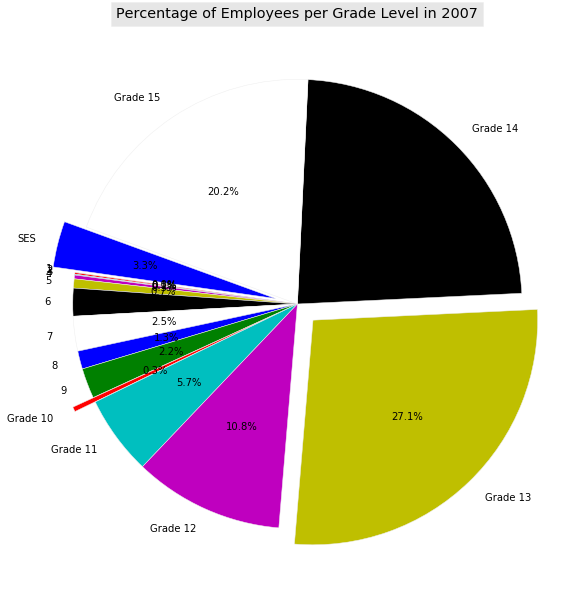

In [61]:
# Grades by Percentages in 2007
figure(1, figsize=(6,6))
ax = axes([0.2, 0.2, 1.3, 1.3])

# The slices will be ordered and plotted counter-clockwise.
labels = 'SES', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Grade 10', 'Grade 11', 'Grade 12', 'Grade 13', 'Grade 14', 'Grade 15'
fracs = [620, 3, 21, 11, 51, 123, 375, 468, 244, 406, 65, 1069, 2022, 5074, 4401, 3784]
explode = [0.1,0,0,0,0,0,0,0,0,0,0.1,0,0,0.1,0,0]

pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=False, startangle=160)

title('Percentage of Employees per Grade Level in 2007', bbox={'facecolor':'0.9', 'pad':5})

show()

As with the 2006 data, grade 13 again maintains the largest percentage of employees per grade level. 

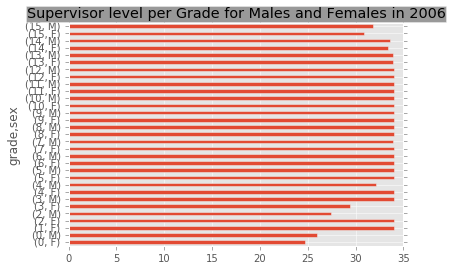

In [37]:
# Supervisor level per Grade for Males and Females in 2006
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

plt.style.use('ggplot')

df_grouped = df.groupby(by=['grade','sex'])
tenure_rate = df_grouped.suplev.sum() / df_grouped.suplev.count()
ax = tenure_rate.plot(kind='barh')

title('Supervisor level per Grade for Males and Females in 2006', bbox={'facecolor':'0.6', 'pad':1})

show()

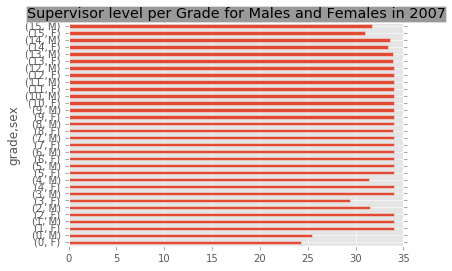

In [65]:
# Supervisor level per Grade for Males and Females in 2007
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

plt.style.use('ggplot')

df_grouped = df2.groupby(by=['grade','sex'])
tenure_rate = df_grouped.suplev.sum() / df_grouped.suplev.count()
ax = tenure_rate.plot(kind='barh')

title('Supervisor level per Grade for Males and Females in 2007', bbox={'facecolor':'0.6', 'pad':1})

show()

For both 2006 and 2007, average supervisor level per grade seems to be pretty consistent around 35. However, at the 15 grade and SES grade, we see that there are fewer females than males. We also see that they are all below the average level 35 supervisor that most of the other grades have. Why is this? We can recall from the first piechart that in NASA, males far outnumber females so this could account for fewer females in the highest grade levels. But let's investigate why there are fewer supervisors. Maybe it has something to do with education? 

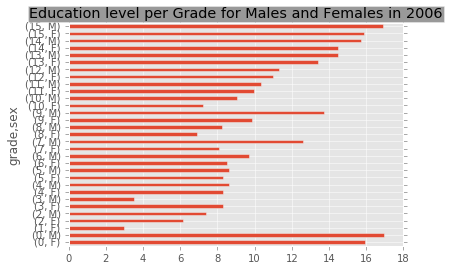

In [38]:
# Education level per Grade for Males and Females in 2006
plt.style.use('ggplot')

df_grouped = df.groupby(by=['grade','sex'])
tenure_rate = df_grouped.edlev.sum() / df_grouped.edlev.count()
ax = tenure_rate.plot(kind='barh')

title('Education level per Grade for Males and Females in 2006', bbox={'facecolor':'0.6', 'pad':1})

show()

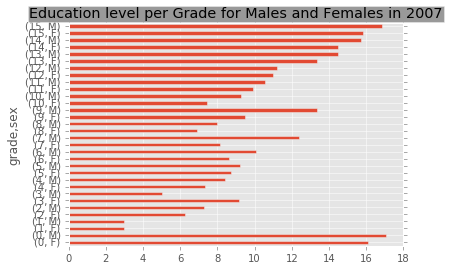

In [66]:
# Education level per Grade for Males and Females in 2007
plt.style.use('ggplot')

df_grouped = df2.groupby(by=['grade','sex'])
tenure_rate = df_grouped.edlev.sum() / df_grouped.edlev.count()
ax = tenure_rate.plot(kind='barh')

title('Education level per Grade for Males and Females in 2007', bbox={'facecolor':'0.6', 'pad':1})

show()

For both 2006 and 2007, we can see the average education level per grade for males and females is highest at the 15th and SES levels. Could this be a contributing factor as to why there are fewer level 35 supervisors in these categories? Maybe since these employees have higher levels of education they need fewer supervisors?  

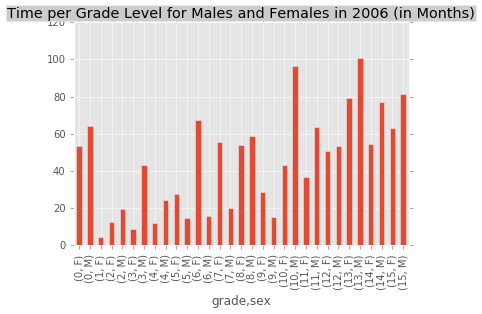

In [40]:
# Time per Grade Level for Males and Females in 2006 (in Months))
plt.style.use('ggplot')

df_grouped = df.groupby(by=['grade','sex'])
time_per_grade = df_grouped.time_in_grade.sum() / df_grouped.time_in_grade.count()
ax = time_per_grade.plot(kind='bar')

title('Time per Grade Level for Males and Females in 2006 (in Months)', bbox={'facecolor':'0.8', 'pad':1})

show()

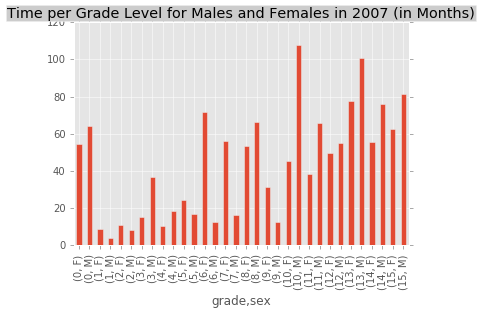

In [67]:
# Time per Grade Level for Males and Females in 2007 (in Months))
plt.style.use('ggplot')

df_grouped = df2.groupby(by=['grade','sex'])
time_per_grade = df_grouped.time_in_grade.sum() / df_grouped.time_in_grade.count()
ax = time_per_grade.plot(kind='bar')

title('Time per Grade Level for Males and Females in 2007 (in Months)', bbox={'facecolor':'0.8', 'pad':1})

show()

Looking at 2006 and 2007, we expect the lower grades to have a small amount of time spent since we assume that these employees easily transfer low skill positions at other companies or ambitiously climb up grade levels based on experience. Conversely, we assume that high grade levels would have a larger average amount of time spent in their grade. It would be more difficult to make the jump from between these grades without extensive experience or the completion of addition schooling, which can take many years. However, we notice that males at grade 10 have almost twice as much time in their grade level as their female counterparts. Is there an outlier?

In [ ]:
#outlier in the grade 10 males?!

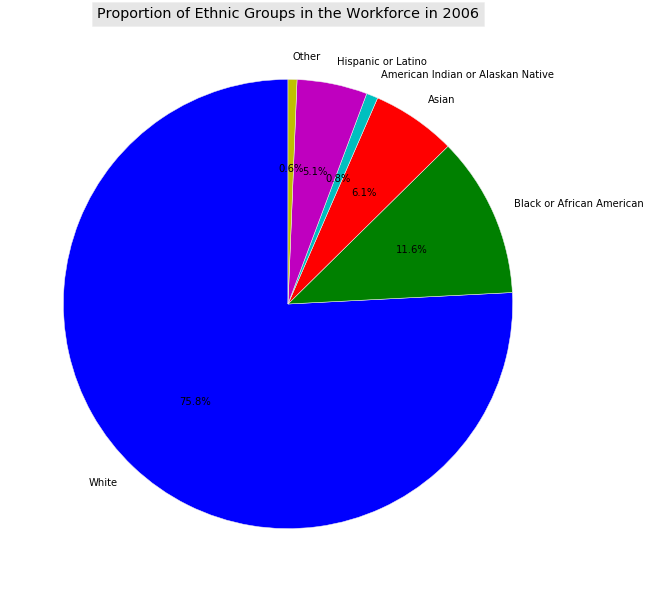

In [68]:
# Breakout of Race and national origin in 2006
figure(1, figsize=(6,6))
ax = axes([0.2, 0.2, 1.3, 1.3])

# The slices will be ordered and plotted counter-clockwise.
# Key:
# 1 - White, 100 = Black or African American, 1000 = Asian, 10000 = American Indian or Alaskan Native, 100000 = Hispanic or Latino
labels = 'White', 'Black or African American', 'Asian', 'American Indian or Alaskan Native', 'Hispanic or Latino',  'Other'
fracs = [14200, 2168, 1139, 156, 947, 120 ]
explode = [0,0,0,0,0,0]

pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=False, startangle=90)

title('Proportion of Ethnic Groups in the Workforce in 2006', bbox={'facecolor':'0.9', 'pad':5})

show()

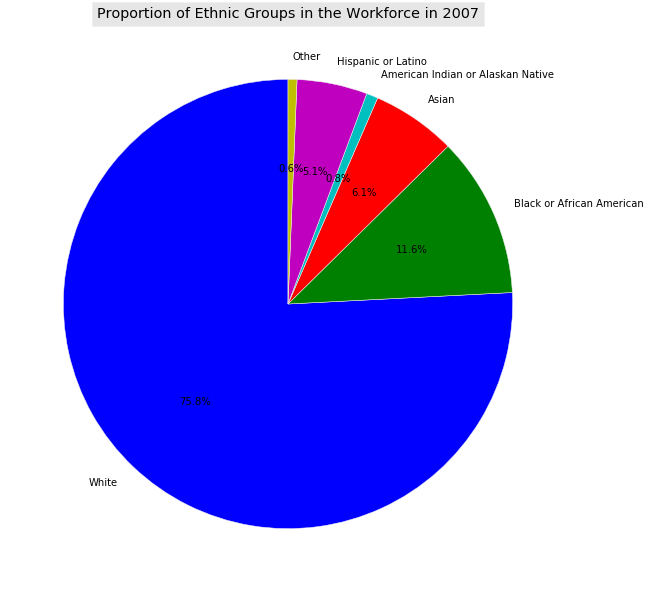

In [69]:
# Breakout of Race and national orgin in 2007
figure(1, figsize=(6,6))
ax = axes([0.2, 0.2, 1.3, 1.3])

# The slices will be ordered and plotted counter-clockwise.
# Key:
# 1 - White, 100 = Black or African American, 1000 = Asian, 10000 = American Indian or Alaskan Native, 100000 = Hispanic or Latino
labels = 'White', 'Black or African American', 'Asian', 'American Indian or Alaskan Native', 'Hispanic or Latino',  'Other'
fracs = [14200, 2168, 1139, 156, 947, 120 ]
explode = [0,0,0,0,0,0]

pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=False, startangle=90)

title('Proportion of Ethnic Groups in the Workforce in 2007', bbox={'facecolor':'0.9', 'pad':5})

show()

For 2006 and 2007, we can see that the workforce is overwhelmingly white. 
This makes sense if we look at the census data for the US around this time. 
In 2010, census.gov (http://www.census.gov/prod/cen2010/briefs/c2010br-02.pdf) reports that white americans make up about 72% of the American population. Proportionally, it seems that NASA workforce diversity mirrors that of the US. 

### Conclusion

Comparing the 2006 and 2007 NASA Human Resources agency, there are a few important things we can immediately notice. First, NASA is a male dominated agency. Males outnumber females almost 2 to 1. That being said, for our next project, we may have to pull random samples from the dataset that guarantees an equal number of males and females for analysis. Doing this would give more meaning to our investigation in average supervisor level per grade and time spent in each grade. 

#####Next Steps
As a team, we would like to explore additional variables like last promotion date and next anticipate promotion date. We suspect that subtracting the next anticipated promotion date from the last promotion date would give us a "promotion window" that we could run against the grade and sex variable. This, in addition to the research we have completed in this document, could be possible key predictors for years that NASA increases or decreases hiring practices for certain grades. 

### Acknowledgments

- Office of Personnel Management (OPM)
- National Aeronautics and Space Administration (NASA)
- NASA Johnson Space Center (JSC)
